<a href="https://colab.research.google.com/github/peiyulin0520/KPMG-virtual-intern-tasks/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#upload data
from google.colab import files
uploaded = files.upload()

Saving KPMG_VI_New_raw_data_update_final.xlsx to KPMG_VI_New_raw_data_update_final.xlsx


In [4]:
#load data
Transactions = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =1, header = 1)
NewCustomerList = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =2, header = 1)
CustomerDemographic = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =3, header = 1)
CustomerAddress = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =4, header = 1)

<ipython-input-4-c1b227bbac12>:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  NewCustomerList = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =2, header = 1)
<ipython-input-4-c1b227bbac12>:4: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  CustomerDemographic = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name =3, header = 1)


---
Task2: get data insight by Data Exploration, Model Development and Interpretation.
---
The datasets provided inlcude Transactions, CustomerDemographic, CustomerAddress, and NewCustomerList.


# Data Preprocessing (CustomerDemographic)

Create a variable (purchased_or_not) in CustomerDemographic dataset to observe whether the customer have made a record in Transactions dataset or not.

In [5]:
# get the list of customer_id in Transactions dataset
id_in_trans = Transactions['customer_id']
# create a boolean varaible (purchased_or_not) in CustomerDemographic dataset
CustomerDemographic['purchased_or_not'] = (CustomerDemographic['customer_id'].isin(id_in_trans))
# CustomerDemographic['purchased_or_not']=CustomerDemographic['purchased_or_not'].\
#                                           replace([True, False], [1, 0])
CustomerDemographic['purchased_or_not'].value_counts()

True     3493
False     507
Name: purchased_or_not, dtype: int64

In [6]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

[179.0, nan, 91.0, 87.0, 82.0, 79.0, 69.0, 68.0, 67.0, 66.0, 65.0]


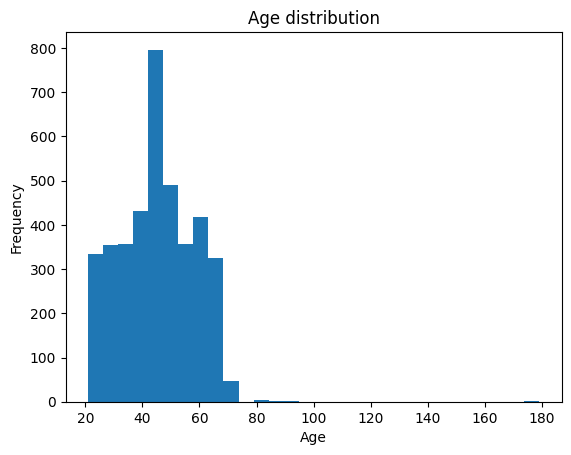

Gender categories:  ['F' 'Male' 'Female' 'U' 'Femal' 'M']
wealth_segment:  ['Mass Customer' 'Affluent Customer' 'High Net Worth']
deceased_indicator:  ['N' 'Y']
owns_car:  ['Yes' 'No']


In [7]:
# clean CustomerDemographic dataset
## copy the original dataset CustomerDemographic
CustomerDemographic1 = CustomerDemographic
## DOB: used for Age calculation
### use the datetime package and check the datetime now
from datetime import datetime
now = datetime.now()
### calculate the age
CustomerDemographic1['age'] = (now - CustomerDemographic1['DOB']).astype('<m8[Y]')

## check age
age_cust = sorted(CustomerDemographic1['age'].unique(), reverse=True)
print(age_cust[0:11])
plt.hist(CustomerDemographic1['age'], bins=30)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## job_title and job_industry_category
### fill NaN data with 'Unknown'
CustomerDemographic1['job_industry_category'] = CustomerDemographic1['job_industry_category'].fillna('Unknown')
CustomerDemographic1['job_title'] = CustomerDemographic1['job_title'].fillna('Unknown')

## check the uniqueness for these columns
print('Gender categories: ', CustomerDemographic1['gender'].unique())
print('wealth_segment: ', CustomerDemographic1['wealth_segment'].unique())
print('deceased_indicator: ', CustomerDemographic1['deceased_indicator'].unique())
print('owns_car: ', CustomerDemographic1['owns_car'].unique())

## Modify value to make each value representative and in the uniform format
CustomerDemographic1['gender'].replace(['Male', 'Female', 'Femal'], ['M', 'F', 'F'], inplace=True)

CustomerDemographic1['deceased_indicator'].unique() # N; Y
CustomerDemographic1['deceased_indicator'].replace(['N', 'Y'], [False,True], inplace=True)

CustomerDemographic1['owns_car'].unique() # N; Y
CustomerDemographic1['owns_car'].replace(['No', 'Yes'], [False,True], inplace=True)

## Australian Bureau of Statistics: the highest male life expectancy is 82.7 yrs
## the highest female life expectancy is 86.3 yrs
## drop rows that the age exceeds the data shown on the website: 
CustomerDemographic1.drop(CustomerDemographic1[(CustomerDemographic1['age']>82.7)&\
                          (CustomerDemographic1['gender'] == 'M')].index,\
                          inplace=True)
CustomerDemographic1.drop(CustomerDemographic1[(CustomerDemographic1['age']>86.3)&\
                          (CustomerDemographic1['gender'] == 'F')].index,\
                          inplace=True)
# for gender U, I set the life expectancy gate the same as F to keep more data
CustomerDemographic1.drop(CustomerDemographic1[(CustomerDemographic1['age']>86.3)&\
                          (CustomerDemographic1['gender'] == 'U')].index,\
                          inplace=True)

## fill NaN in tenure and age with their mean
tenure_mean = CustomerDemographic1['tenure'].mean()
age_mean = CustomerDemographic1['age'].mean()
CustomerDemographic1['tenure'].fillna(tenure_mean, inplace=True)
CustomerDemographic1['age'].fillna(age_mean, inplace=True)

## drop column that is not useful for classification
CustomerDemographic1 = CustomerDemographic1.drop(columns=['first_name', \
                                                        'last_name', 'default',\
                                                        'DOB', 'job_title'])
# transform variables to dummy variables
CustomerDemographic2 = CustomerDemographic1
CustomerDemographic2 = pd.get_dummies(data=CustomerDemographic1,\
                            columns=['gender', 'job_industry_category',\
                                     'wealth_segment'])

# remove one categories in each group to avoid multicollinearity and also customer_id
CustomerDemographic2.drop(columns=['customer_id','gender_U',\
                                   'job_industry_category_Unknown',\
                                   'wealth_segment_Affluent Customer'],\
                           inplace=True)

In [8]:
CustomerDemographic2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3997 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   past_3_years_bike_related_purchases       3997 non-null   int64  
 1   deceased_indicator                        3997 non-null   bool   
 2   owns_car                                  3997 non-null   bool   
 3   tenure                                    3997 non-null   float64
 4   purchased_or_not                          3997 non-null   bool   
 5   age                                       3997 non-null   float64
 6   gender_F                                  3997 non-null   uint8  
 7   gender_M                                  3997 non-null   uint8  
 8   job_industry_category_Argiculture         3997 non-null   uint8  
 9   job_industry_category_Entertainment       3997 non-null   uint8  
 10  job_industry_category_Financial Serv

# Data Modelling Linear Regression

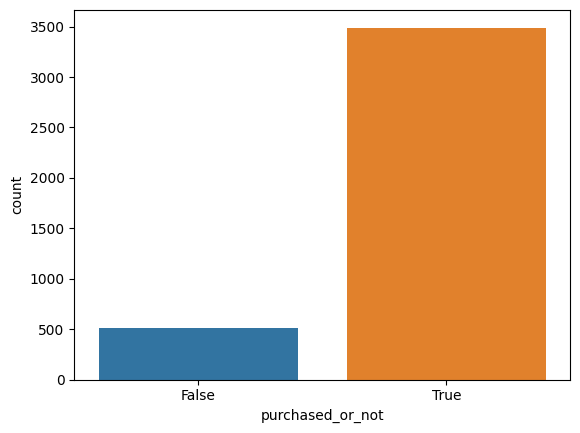

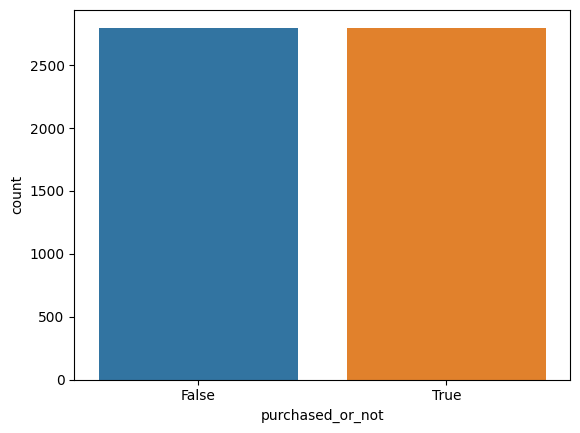

[-3.68161551]
[[-2.03990050e-03 -1.30615858e+00 -5.98177765e-01  1.50384911e-02
  -9.58732451e-03  2.79083117e+00  3.18705221e+00  2.30853695e+00
   2.44767488e+00  2.24767408e+00  2.28568815e+00  3.48713112e+00
   2.17956805e+00  2.04875997e+00  1.92482173e+00  1.99730572e+00
   1.38411086e+00  1.10480117e+00]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
# load required packages
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

# over sampling
## view the overall target varaible - purchased_or_not
sns.countplot(x='purchased_or_not', data=CustomerDemographic2)
plt.show()
## get the train and test datasets
X = CustomerDemographic2.loc[:, CustomerDemographic2.columns != 'purchased_or_not']
y = CustomerDemographic2.loc[:, CustomerDemographic2.columns == 'purchased_or_not']
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['purchased_or_not'])

# check whether the data is balanced after oversampling
sns.countplot(x='purchased_or_not', data=os_data_y)
plt.show()

# build a Logistic Regression model
# first time try
# logit_model=sm.Logit(os_data_y,sm.add_constant(os_data_X))
# result=logit_model.fit()
# print(result.summary())
# second time try
# model = LogisticRegression()
# model.fit(os_data_X, os_data_y)
# os_data_X = sm.add_constant(os_data_X)
# logit_model = sm.Logit(os_data_y, os_data_X)
# result = logit_model.fit()
# p_values = result.pvalues

model = LogisticRegression(solver='liblinear', random_state=0).fit(os_data_X, os_data_y)

intercept = model.intercept_
coefficients = model.coef_
print(intercept)
print(coefficients)
# # cross validation:
# logreg = LogisticRegression()
# scores = cross_val_score(logreg, os_data_X, os_data_y, cv=5)
# print('cross-validation scores: ', scores)
# print('mean accuracy: ', scores.mean())
# print('standard deviation: ', scores.std())

# Model Evaluation

In [10]:
# get the accuracy of the model
accuracy_train = model.score(os_data_X,os_data_y)
accuracy_test = model.score(X_test,y_test)
y_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)[:, 1]
report = classification_report(y_test, y_pred)

print(accuracy_train, accuracy_test)
print(report)

0.8379778492318686 0.77375
              precision    recall  f1-score   support

       False       0.12      0.11      0.12       109
        True       0.86      0.88      0.87       691

    accuracy                           0.77       800
   macro avg       0.49      0.49      0.49       800
weighted avg       0.76      0.77      0.77       800



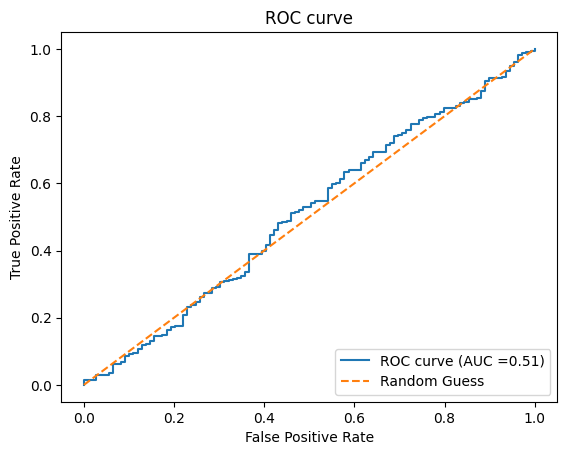

In [11]:
# plot ROC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label ='ROC curve (AUC =%0.2f)' %roc_auc)
plt.plot([0,1], [0,1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

# Data Modelling SVM

In [12]:
# try svm
from sklearn import svm
from sklearn.metrics import accuracy_score
clf = svm.SVC(kernel='rbf')
clf.fit(os_data_X, os_data_y)
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(os_data_X)

accuracy_test_svm = accuracy_score(y_test, y_pred_test)
accuracy_train_svm = accuracy_score(os_data_y, y_pred_train)

print(accuracy_train_svm, accuracy_test_svm)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6041443372633083 0.5825


In [ ]:
CustomerDemographic1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3997 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3997 non-null   int64  
 1   gender                               3997 non-null   object 
 2   past_3_years_bike_related_purchases  3997 non-null   int64  
 3   job_industry_category                3997 non-null   object 
 4   wealth_segment                       3997 non-null   object 
 5   deceased_indicator                   3997 non-null   bool   
 6   owns_car                             3997 non-null   bool   
 7   tenure                               3997 non-null   float64
 8   purchased_or_not                     3997 non-null   bool   
 9   age                                  3997 non-null   float64
dtypes: bool(3), float64(2), int64(2), object(3)
memory usage: 261.5+ KB


In [13]:
# try decision trees
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.feature_selection import mutual_info_classif

# clf = DecisionTreeClassifier()
# clf.fit(os_data_X, os_data_y)
# importances = clf.feature_importances_
# feature_importance_df = pd.DataFrame({'Feature': os_data_X.columns, \
#                                       'Importance':importances})
# feature_importance_df = feature_importance_df.sort_values(by='Importance',\
#                                                           ascending=False)
# print(feature_importance_df)


# info_gain = mutual_info_classif(os_data_X, os_data_y)
# for i, feature in enumerate(os_data_X.columns):
#   print(f'Feature: {feature}, Information Gain:{info_gain[i]}')

# Data Preprocessing (Merged three datasets)



In [14]:
# merge three of the datasets firstly: use inner join because the purpose is to target customers, who would make a purchase
# keep all customer data
all_data = CustomerDemographic1.merge(Transactions, how='left', on='customer_id').merge(CustomerAddress, how='inner', on='customer_id')

In [15]:
all_data.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,purchased_or_not,age,...,product_class,product_size,list_price,standard_cost,product_first_sold_date,address,postcode,state,country,property_valuation
0,1,F,93,Health,Mass Customer,False,True,11.0,True,69.0,...,medium,medium,235.63,125.07,38482.0,060 Morning Avenue,2016,New South Wales,Australia,10
1,1,F,93,Health,Mass Customer,False,True,11.0,True,69.0,...,medium,medium,1577.53,826.51,39526.0,060 Morning Avenue,2016,New South Wales,Australia,10
2,1,F,93,Health,Mass Customer,False,True,11.0,True,69.0,...,low,small,1720.70,1531.42,37823.0,060 Morning Avenue,2016,New South Wales,Australia,10
3,1,F,93,Health,Mass Customer,False,True,11.0,True,69.0,...,medium,medium,360.40,270.30,37873.0,060 Morning Avenue,2016,New South Wales,Australia,10
4,1,F,93,Health,Mass Customer,False,True,11.0,True,69.0,...,medium,medium,71.49,53.62,38573.0,060 Morning Avenue,2016,New South Wales,Australia,10


In [16]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20451 entries, 0 to 20450
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          20451 non-null  int64         
 1   gender                               20451 non-null  object        
 2   past_3_years_bike_related_purchases  20451 non-null  int64         
 3   job_industry_category                20451 non-null  object        
 4   wealth_segment                       20451 non-null  object        
 5   deceased_indicator                   20451 non-null  bool          
 6   owns_car                             20451 non-null  bool          
 7   tenure                               20451 non-null  float64       
 8   purchased_or_not                     20451 non-null  bool          
 9   age                                  20451 non-null  float64       
 10  transactio

From the overview, we can conclude that some customer_id in Transactions are not in CustomerDemographic or CustomerAddress, so the number of data jump from 20,000 to 19,968. The following step is data preprocessing.
1. Handle unreasonable data
2. Handle missing values
3. Change data type: online_order (bool), online_status (bool), deceased_indicator (bool), owns_car (bool), and postcode (str)
4. Add additional variables: Age, number of transactions, profit for each transaction, sum profit gain from each customer

In [17]:
# Data Preprocessing - handle unreasonable data
all_data_clean = all_data
## check order status
print('order_status','\n', all_data_clean['order_status'].value_counts()) 
# includes 'Approved' 'Cancelled'

## drop rows that are unreasonable
all_data_clean = all_data_clean.drop(all_data_clean[(\
                  all_data_clean['order_status'] == 'Cancelled')].index)

## country
print('the number of country: ' + str(all_data_clean['country'].nunique())) 
# only 1 unique country

## state
print('state list','\n', all_data_clean['state'].unique()) 
## modify data to make it uniform
all_data_clean['state'].replace(['New South Wales', 'Victoria'], ['NSW', 'VIC'],\
                                inplace=True)
## verify the outcome
print('Verify state list','\n', all_data_clean['state'].unique()) 

## address
print('the number of address: ' + str(all_data_clean['address'].nunique())) 

## customer_id
issue_value= [i for i in range(1, 4001)]
print(len(all_data_clean[~all_data_clean['customer_id'].isin(issue_value)])) # 0
all_data_clean['customer_id'].agg(['max', 'min']) # max:4000; min:1
## the outcome shows no unreasinable data after left join Transactions data to CustomerDemographic 

## drop columns that are not useful
all_data_clean = all_data_clean.drop(columns=['country', 'order_status',\
                                              'address'])

order_status 
 Approved     19766
Cancelled      178
Name: order_status, dtype: int64
the number of country: 1
state list 
 ['New South Wales' 'QLD' 'VIC' 'NSW' 'Victoria']
Verify state list 
 ['NSW' 'QLD' 'VIC']
the number of address: 3989
0


Unreasonable data:
1. order_status: shouldn't consider transactions that are cancelled, and remove the feature once drop rows that are Cancelled.
2. state: have different categories for the same definition
3. address: 3,989 unique addresses. The address is too many for data clustering
4. country: each customer comes from Australia, so it is not useful to include country for clustering or analysis

In [18]:
all_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20273 entries, 0 to 20450
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          20273 non-null  int64         
 1   gender                               20273 non-null  object        
 2   past_3_years_bike_related_purchases  20273 non-null  int64         
 3   job_industry_category                20273 non-null  object        
 4   wealth_segment                       20273 non-null  object        
 5   deceased_indicator                   20273 non-null  bool          
 6   owns_car                             20273 non-null  bool          
 7   tenure                               20273 non-null  float64       
 8   purchased_or_not                     20273 non-null  bool          
 9   age                                  20273 non-null  float64       
 10  transactio

Add addditional varaibles:
1. n_transactions: the number of transactions a customer has made
2. profit: list_price - standard_cost
3. sum_profit: the sum of the profits from each transactions a customer has made
4. total_spend: the amount that the customer have spent to purchase bike relevant products

In [19]:
# Data preprocessing - add addirional features
# fill NaN in transaction_id with 0
all_data_clean['transaction_id'].fillna(0, inplace=True)
# calculate the number of transaction for each customer_id
all_data_clean['n_transactions'] = all_data_clean.groupby('customer_id')\
                                      ['transaction_id'].transform('count')

# calculate the profit of each transaction
all_data_clean['profit'] = all_data_clean['list_price'] - \
                             all_data_clean['standard_cost']  

# calculate the sum of profit earned from each customer
all_data_clean['sum_profit'] = all_data_clean.groupby('customer_id')\
                                      ['profit'].transform('sum')

# calculate the spending power each customer has                                     
all_data_clean['total_spend'] = all_data_clean.groupby('customer_id')\
                                ['list_price'].transform('sum')                              

In [ ]:
# -- not use
# get how many people don't have a transaction record
# all_data[all_data[['transaction_id']].isna().any(axis=1)]['customer_id'].nunique()
# # 507 existing customers haven't made a purchase

# # create a variable: n_transaction to get the number of transaction a customer has made
# print(0 in all_data['transaction_id'].values) # 0 is not in transaction_id
# # fill NaN values in transaction_id with 0
# all_data['transaction_id'].fillna(0, inplace=True)
# all_data['n_transaction'] = all_data.groupby('customer_id')['transaction_id'].\
#                             transform(lambda x: (x!=0).sum())                      
# # check whether the function works well
# # all_data['customer_id'].value_counts().get(4000,0)

# # create a boolean variable: purchase_or_not
# all_data['purchase_or_not'] = (all_data['n_transaction'] > 0)
# --

In [20]:
all_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20273 entries, 0 to 20450
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          20273 non-null  int64         
 1   gender                               20273 non-null  object        
 2   past_3_years_bike_related_purchases  20273 non-null  int64         
 3   job_industry_category                20273 non-null  object        
 4   wealth_segment                       20273 non-null  object        
 5   deceased_indicator                   20273 non-null  bool          
 6   owns_car                             20273 non-null  bool          
 7   tenure                               20273 non-null  float64       
 8   purchased_or_not                     20273 non-null  bool          
 9   age                                  20273 non-null  float64       
 10  transactio

Missing values:
1. online_order: not an important feature when identified new target customers
2. brand; product_line; product_class; product_size; product_first_sold_date; standard_cost: they all belong to product_id=0, and not useful to identify new target customers
3. last_name : not an important feature for data clustering
4. DOB: not an important feature after getting the age feature
5. job_title: Fill NaN with 'Unknown' category
6. job_industry_category: Fill NaN with 'Unknown' category
7. default: not helpful because it does not contain meaningful text or data
8. tenure: remove missing value to avoid misleading clustering result

In [21]:
# Data preprocessing - handle missing data
## online_order variable: not important for getting new targeted customers

## brand; product_line; product_class; product_size and product_first_sold_date;  
## standard_cost have same amount of missing data
## get the data, which is NaN in these columns
miss_df = Transactions[Transactions[['brand', 'product_line', 'product_class',\
                                     'product_size', \
                                     'standard_cost',\
                                     'product_first_sold_date']].\
                       isna().any(axis=1)]
print('number of unique data:\n', miss_df.nunique())
print('\nproduct_id is: ', int(miss_df['product_id'].unique()))

## remove features that are unnecessary
all_data_clean1 = all_data_clean.drop(columns=['brand', 'product_line',\
                                               'product_class','product_size', \
                                               'standard_cost',\
                                               'product_first_sold_date'])

## fill NaN in profit with 0 if transaction_id is 0 as well (means no transaction)
all_data_clean1.loc[all_data_clean1['transaction_id'] == 0, 'profit'] =\
 all_data_clean1.loc[all_data_clean1['transaction_id'] == 0, 'profit'].fillna(0)

number of unique data:
 transaction_id             197
product_id                   1
customer_id                192
transaction_date           154
online_order                 2
order_status                 2
brand                        0
product_line                 0
product_class                0
product_size                 0
list_price                 196
standard_cost                0
product_first_sold_date      0
dtype: int64

product_id is:  0


In [22]:
all_data_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20273 entries, 0 to 20450
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          20273 non-null  int64         
 1   gender                               20273 non-null  object        
 2   past_3_years_bike_related_purchases  20273 non-null  int64         
 3   job_industry_category                20273 non-null  object        
 4   wealth_segment                       20273 non-null  object        
 5   deceased_indicator                   20273 non-null  bool          
 6   owns_car                             20273 non-null  bool          
 7   tenure                               20273 non-null  float64       
 8   purchased_or_not                     20273 non-null  bool          
 9   age                                  20273 non-null  float64       
 10  transactio

In [23]:
# remove some variables not used in the clustering and modelling 
all_data_clean1.drop(columns=['transaction_date', 'online_order'], inplace=True)

# remove rows that profit is still NaN (have transaction but don't have price and cost information)
all_data_clean1.dropna(subset=['profit'], inplace=True)

# check product_id and list_price
missing_df = all_data_clean1[all_data_clean1[['product_id', 'list_price']].isna().any(axis=1)]
print("the transaction_id that doesn't have product_id or list_price: " +\
      str(missing_df['transaction_id'].unique())) # is only 0, meaning no transaction

# fill NaN in product_id with None
all_data_clean1['product_id'] = all_data_clean1['product_id'].astype(str)
all_data_clean1['product_id'].fillna('None', inplace=True)

# fill NaN in list_price with 0
all_data_clean1['list_price'].fillna(0, inplace=True)

the transaction_id that doesn't have product_id or list_price: [0.]


In [24]:
all_data_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20080 entries, 0 to 20450
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          20080 non-null  int64  
 1   gender                               20080 non-null  object 
 2   past_3_years_bike_related_purchases  20080 non-null  int64  
 3   job_industry_category                20080 non-null  object 
 4   wealth_segment                       20080 non-null  object 
 5   deceased_indicator                   20080 non-null  bool   
 6   owns_car                             20080 non-null  bool   
 7   tenure                               20080 non-null  float64
 8   purchased_or_not                     20080 non-null  bool   
 9   age                                  20080 non-null  float64
 10  transaction_id                       20080 non-null  float64
 11  product_id                  

In [25]:
# double check the categories in each object variable to make sure not have multi-representation
for i in all_data_clean1.columns:
  if all_data_clean1[i].dtype == object:
    print(i + ": " + str(all_data_clean1[i].unique()))

gender: ['F' 'M' 'U']
job_industry_category: ['Health' 'Financial Services' 'IT' 'Unknown' 'Retail' 'Argiculture'
 'Property' 'Manufacturing' 'Telecommunications' 'Entertainment']
wealth_segment: ['Mass Customer' 'Affluent Customer' 'High Net Worth']
product_id: ['86.0' '38.0' '47.0' '72.0' '2.0' '25.0' '23.0' '31.0' '32.0' '9.0'
 '11.0' '1.0' '85.0' '26.0' '95.0' '62.0' '34.0' '84.0' '39.0' '96.0'
 '13.0' '0.0' '54.0' '77.0' '12.0' '5.0' '22.0' '15.0' '3.0' '76.0' '4.0'
 '89.0' '45.0' '59.0' '36.0' '69.0' '6.0' '28.0' '10.0' '30.0' '91.0'
 '44.0' '66.0' '17.0' '49.0' '92.0' '56.0' '68.0' '67.0' '41.0' '33.0'
 '81.0' '94.0' '99.0' '78.0' '70.0' '87.0' '97.0' '40.0' '16.0' '7.0'
 '48.0' '37.0' '53.0' '52.0' '18.0' '80.0' '57.0' '79.0' '63.0' '19.0'
 '82.0' '65.0' '46.0' '74.0' '21.0' '43.0' '8.0' '20.0' '98.0' '27.0'
 '14.0' '60.0' '35.0' '73.0' '93.0' '55.0' '100.0' '50.0' '29.0' '83.0'
 '75.0' '71.0' '64.0' '24.0' '58.0' '51.0' '61.0' '90.0' '88.0' '42.0'
 'nan']
state: ['NSW' 'QLD' '

In [26]:
# change data type
all_data_clean2 = all_data_clean1
all_data_clean2['postcode'] = all_data_clean2['postcode'].astype(str)

# Data Exploration (EDA)

In [27]:
eda = pd.DataFrame({'value':[all_data_clean2.duplicated(subset=['customer_id',\
                                                        'product_id']).sum(),\
                             len(all_data_clean2),\
                             all_data_clean2['customer_id'].nunique()]},\
                   index=['The number of repurchase the same product',\
                      'The number of transactions','The number of customers'])


eda.head()

,value
The number of repurchase the same product,1092
The number of transactions,20080
The number of customers,3992


In [30]:
all_data_clean2['purchased_or_not'].unique()

array([ True, False])

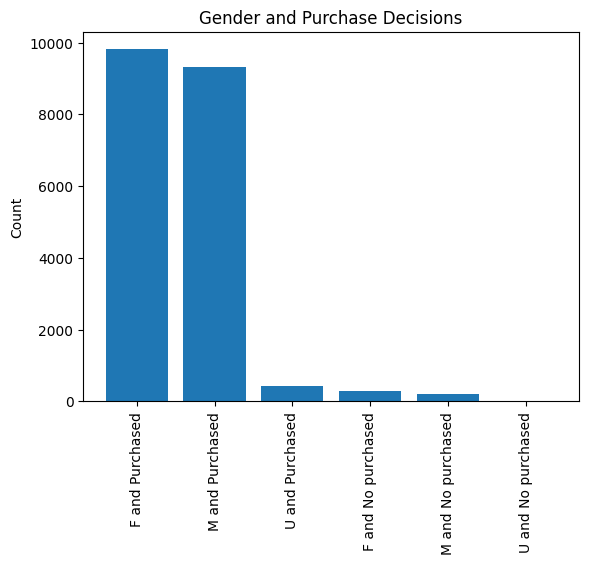

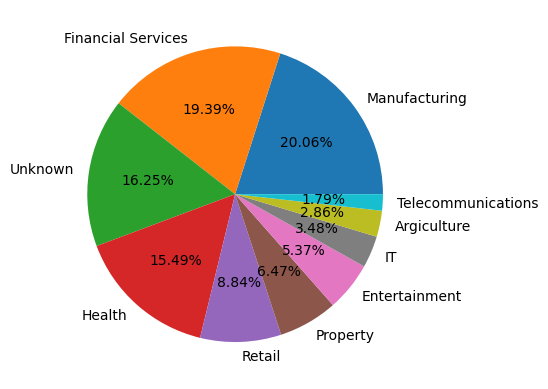

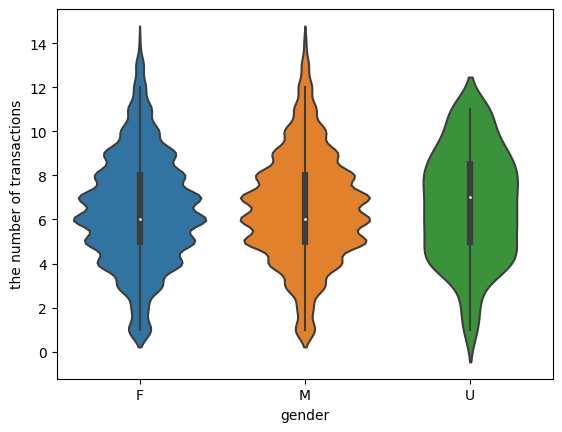

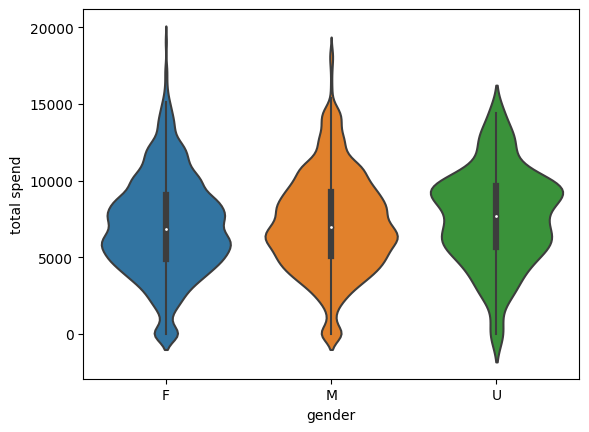

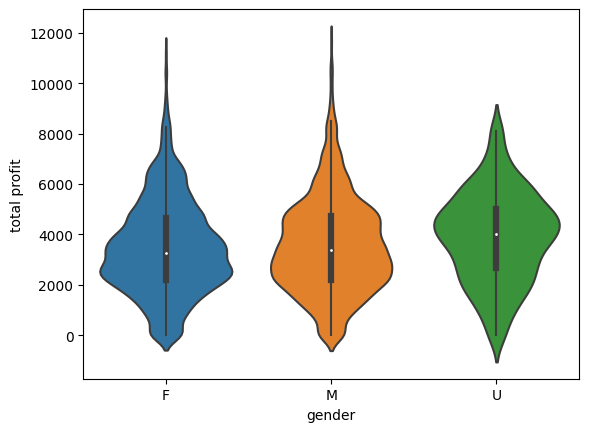

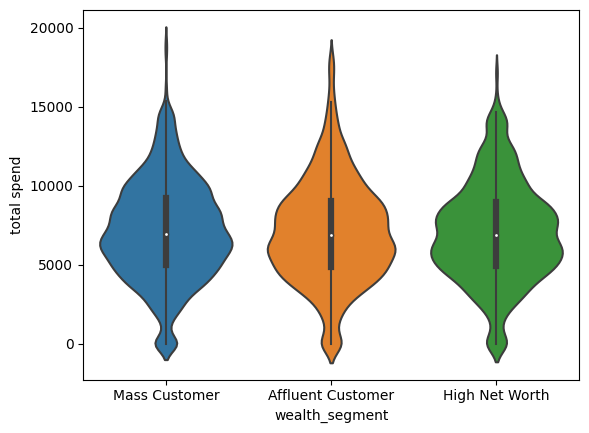

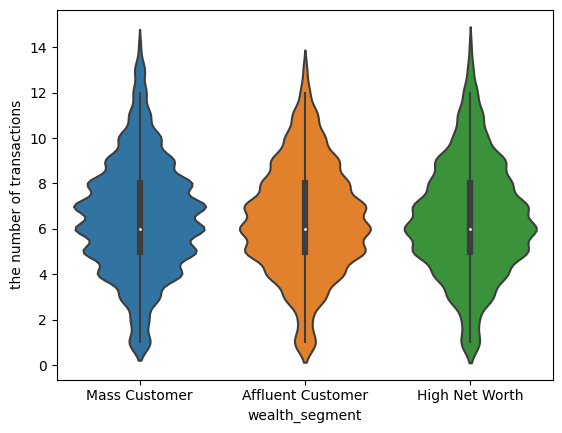

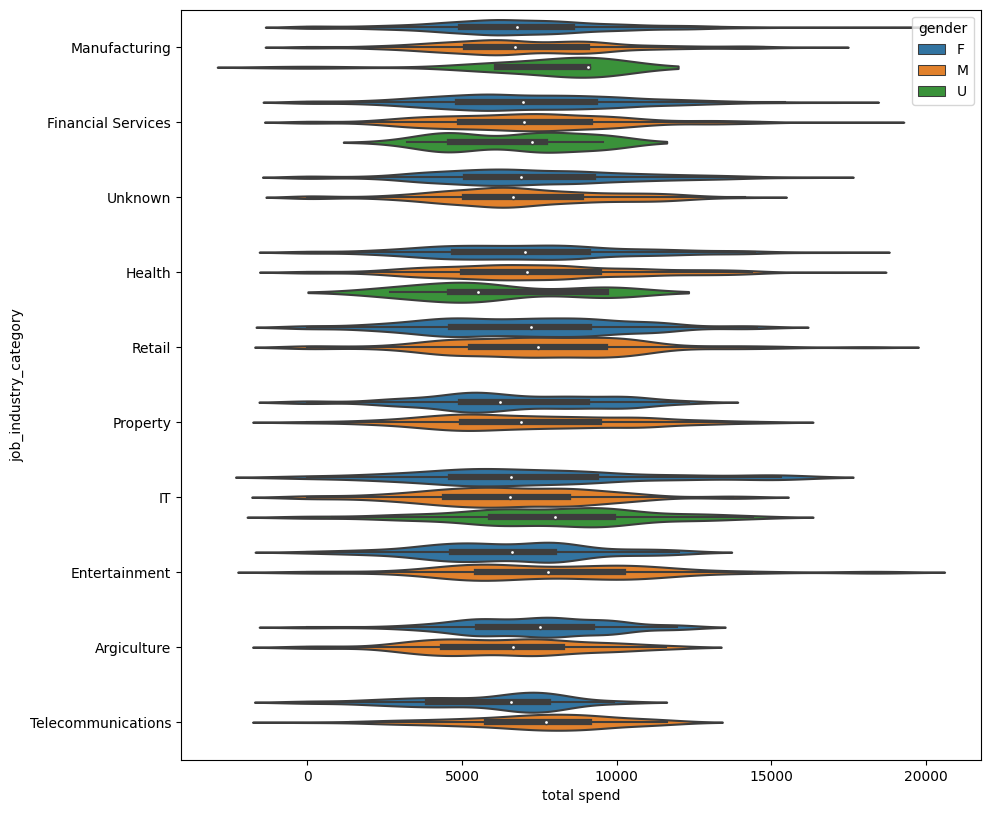

In [31]:
# draw some plots for data exploration
### purchased_or_not
combination_g_p_count = all_data_clean2.groupby(['gender', 'purchased_or_not']).size()
f_true_count = combination_g_p_count.loc[('F', True)]
f_false_count = combination_g_p_count.loc[('F', False)]
m_true_count = combination_g_p_count.loc[('M', True)]
m_false_count = combination_g_p_count.loc[('M', False)]
u_true_count = combination_g_p_count.loc[('U', True)]
u_false_count = combination_g_p_count.loc[('U', False)]
labels = ['F and Purchased', 'F and No purchased', 'M and Purchased',\
          'M and No purchased', 'U and Purchased', 'U and No purchased']
counts=[f_true_count, f_false_count, m_true_count, m_false_count,\
        u_true_count, u_false_count]
x_pos=np.arange(len(labels))
sorted_indices = np.argsort(counts)[::-1]
labels = [labels[i] for i in sorted_indices]
counts = [counts[i] for i in sorted_indices]
plt.bar(x_pos, counts, align='center')
plt.xticks(x_pos, labels, rotation='vertical')
plt.ylabel('Count')
plt.title('Gender and Purchase Decisions')
plt.show()

##job_industry_category
df_industry = all_data_clean2['job_industry_category'].value_counts()
p_labels = ['Manufacturing', 'Financial Services', 'Unknown', 'Health',\
            'Retail', 'Property', 'Entertainment', 'IT', 'Argiculture',\
            'Telecommunications'] #the descending order based on the value counts
plt.pie(df_industry, labels = p_labels, autopct='%0.2f%%')
plt.show()

sns.violinplot(data=all_data_clean2, x='gender', y='n_transactions')
# sns.swarmplot(data=clustering_data, x='gender', y='n_transactions', palette='dark', alpha=0.5)
plt.xlabel('gender')
plt.ylabel('the number of transactions')
plt.show()

sns.violinplot(data=all_data_clean2, x='gender', y='total_spend')
# sns.swarmplot(data=clustering_data, x='gender', y='n_transactions', palette='dark', alpha=0.5)
plt.xlabel('gender')
plt.ylabel('total spend')
plt.show()

sns.violinplot(data=all_data_clean2, x='gender', y='sum_profit')
# sns.swarmplot(data=clustering_data, x='gender', y='n_transactions', palette='dark', alpha=0.5)
plt.xlabel('gender')
plt.ylabel('total profit')
plt.show()

sns.violinplot(data=all_data_clean2, x='wealth_segment', y='total_spend')
# sns.swarmplot(data=clustering_data, x='gender', y='n_transactions', palette='dark', alpha=0.5)
plt.xlabel('wealth_segment')
plt.ylabel('total spend')
plt.show()

sns.violinplot(data=all_data_clean2, x='wealth_segment', y='n_transactions')
# sns.swarmplot(data=clustering_data, x='gender', y='n_transactions', palette='dark', alpha=0.5)
plt.xlabel('wealth_segment')
plt.ylabel('the number of transactions')
plt.show()

plt.figure(figsize=(10,10))
order = df_industry.index
sns.violinplot(data=all_data_clean2, y='job_industry_category', x='total_spend', hue='gender', order=order)
# sns.swarmplot(data=clustering_data, x='gender', y='n_transactions', palette='dark', alpha=0.5)
plt.ylabel('job_industry_category')
plt.xlabel('total spend')
plt.subplots_adjust(bottom=0.15, top=0.9,left=0.1, right=0.9)
plt.show()




# Data Clustering

In [32]:
# one hot encoding
all_data_clean2 = pd.get_dummies(data=all_data_clean2, \
                                 columns=['job_industry_category','state',\
                                          'gender', 'wealth_segment'])
# remove unused features
all_data_clean2.drop(columns=['customer_id', 'transaction_id', 'postcode', \
                              'product_id'], inplace=True)
print('The number of remained columns: ',len(all_data_clean2.columns))

The number of remained columns:  31


In [ ]:
#@title
# # check correlation and display outcomes that has high correlation value (0.8)
# all_data_clean3 = all_data_clean2.copy()
# ## get the features which have high correlation
# corr_matrix = all_data_clean3.corr()
# pos_threshold = 0.8
# neg_threshold = -0.8
# combinations = set()

# for i, row in corr_matrix.iterrows():
#   for column, value in row.items():
#     value = row[column]
#     if value >= pos_threshold or value <= neg_threshold:
#       combination = (i, column)
#       combinations.add(combination)

# unique_combinations = set()
# for combination in combinations:
#   if len(combination)> 1 and len(set(combination))==2:
#     sorted_combination = tuple(sorted(combination))
#     reversed_combination = tuple(reversed(sorted_combination))
#     if sorted_combination not in unique_combinations and \
#     reversed_combination not in unique_combinations:
#       unique_combinations.add(sorted_combination)

# print('**********The highly correlated combinations**********')
# for combination in unique_combinations:
#   print(combination, 'correlation value is: ', corr_matrix.loc[combination[0], combination[1]])


# ## correlation plot
# corr = all_data_clean3.corr()
# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111)
# cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
# fig.colorbar(cax)
# ticks = np.arange(0,len(all_data_clean3.columns),1)
# ax.set_xticks(ticks)
# plt.xticks(rotation=90)
# ax.set_yticks(ticks)
# ax.set_xticklabels(all_data_clean3.columns)
# ax.set_yticklabels(all_data_clean3.columns)
# plt.hlines(y=np.arange(0, 31)+0.5, xmin=np.full(31, 0)-0.5,\
#            xmax=np.full(31, 31)-0.5, color="black")
# plt.vlines(x=np.arange(0, 31)+0.5, ymin=np.full(31, 0)-0.5,\
#            ymax=np.full(31, 31)-0.5, color="black")
plt.show()

Notice three highly correlated combinations, and need to remove come features to minimise the impact on clustering outcome.

1.   Remove gender_F
2.   Remove total_spend







In [ ]:
#@title
# # before clustering, also check multicollinearity
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # drop features for vif
# vif_data = all_data_clean3.drop(columns=['gender_F', 'total_spend'])

# ## remove one variable in each set of dummy variable and target variable: 
# ## wealth_segment_Mass Customer; state_NSW; job_industry_category_Unknown
# vif_data.drop(columns=['wealth_segment_Mass Customer', 'state_NSW', \
#                               'job_industry_category_Unknown',\
#                                'purchased_or_not'], inplace=True)
# ## convert bool type to int to apply vif
# for i in vif_data.columns:
#   if vif_data[i].dtype == bool:
#     vif_data[i] = vif_data[i].astype(int)

# ## get vif
# vif = pd.DataFrame()
# vif['Features'] = vif_data.columns
# vif["VIF"] = [variance_inflation_factor(vif_data.values, i)
#                           for i in range(len(vif_data.columns))]
# print(vif)

I want to keep age, n_transactions, and sum_profit in the dataset although they have high VIF value. To avoid multicollinearity issue, I plan to standarized all features, excluding dummy variables, to lower the vif and for k means clustering as well.

In [ ]:
#@title
# from sklearn.preprocessing import StandardScaler
# columns_to_standarized = ['age', 'sum_profit', 'n_transactions', 'profit',\
#                           'tenure', 'list_price', 'property_valuation',\
#                           'past_3_years_bike_related_purchases']
# scaler = StandardScaler()
# scaled_data = vif_data.copy()
# scaled_data[columns_to_standarized] = scaler.fit_transform(scaled_data[columns_to_standarized])

# ## get vif
# vif = pd.DataFrame()
# vif['Features'] = scaled_data.columns
# vif["VIF"] = [variance_inflation_factor(scaled_data.values, i)
#                           for i in range(len(scaled_data.columns))]
# print(vif)

In [ ]:
#@title
# from sklearn.decomposition import PCA
# # reduce the dimensions using PCA
# ## two dimensions
# pca_2 = PCA(n_components=2)
# pca_2_result = pca_2.fit_transform(scaled_data)
# print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
# ## >> Explained variation per principal component: [0.21258501 0.14567066]

# print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))
# ## >> Cumulative variance explained by 2 principal components: 35.83%

# ## three dimensions
# pca_3 = PCA(n_components=3)
# pca_3_result = pca_3.fit_transform(scaled_data)
# print('Explained variation per principal component: {}'.format(pca_3.explained_variance_ratio_))
# ## >> Explained variation per principal component: [0.21258501 0.14567066 0.13690042]

# print('Cumulative variance explained by 3 principal components: {:.2%}'.format(np.sum(pca_3.explained_variance_ratio_)))
# ## >> Cumulative variance explained by 3 principal components: 49.52%

# ## four dimensions
# pca_4 = PCA(n_components=4)
# pca_4_result = pca_4.fit_transform(scaled_data)
# print('Explained variation per principal component: {}'.format(pca_4.explained_variance_ratio_))
# ## >> Explained variation per principal component: [0.21258501 0.14567066 0.13690042 0.10348373]

# print('Cumulative variance explained by 4 principal components: {:.2%}'.format(np.sum(pca_4.explained_variance_ratio_)))
# ## >> Cumulative variance explained by 4 principal components: 59.86%

# ## five dimensions
# pca_5 = PCA(n_components=5)
# pca_5_result = pca_5.fit_transform(scaled_data)
# print('Explained variation per principal component: {}'.format(pca_5.explained_variance_ratio_))
# ## >> Explained variation per principal component: [0.21258501 0.14567066 0.13690042 0.10348373 0.09960829]

# print('Cumulative variance explained by 5 principal components: {:.2%}'.format(np.sum(pca_5.explained_variance_ratio_)))
# ##>> Cumulative variance explained by 5 principal components: 69.82%

In [ ]:
#@title
# # finding important features with the help of PCA
# dataset_pca = pd.DataFrame(abs(pca_5.components_), columns= scaled_data.columns, index = ['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5'])
# dataset_pca.head()

In [ ]:
#@title
# from sklearn.cluster import KMeans
# # k means
# sse=[]
# k_list = range(1,31)

# for k in k_list:
#   km = KMeans(n_clusters=k)
#   km.fit(scaled_data)
#   sse.append([k, km.inertia_])

# oca_results_scale = pd.DataFrame({'Cluster': range(1, 31), 'SSE': sse})
# # plt.figure(figsize=(10,10))
# plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker = 'o')
# plt.title('Optimal Number of Clusters using Elbow Method (Scaled data)')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')

In [ ]:
#@title
# plt.figure(figsize=(12,8))
# plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker = 'o')
# plt.title('Optimal Number of Clusters using Elbow Method (Scaled data)')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')

In [ ]:
#@title
# from sklearn.metrics import silhouette_samples, silhouette_score
# scaled_data1 = scaled_data.copy()

# kmeans_scale_2 = KMeans(n_clusters = 2, n_init=100, max_iter=400, init='k-means++',\
#                       random_state=42).fit(scaled_data1)
# kmeans_scale_3 = KMeans(n_clusters = 3, n_init=100, max_iter=400, init='k-means++',\
#                       random_state=42).fit(scaled_data1)
# kmeans_scale_4 = KMeans(n_clusters = 4, n_init=100, max_iter=400, init='k-means++',\
#                       random_state=42).fit(scaled_data1)
# kmeans_scale_5 = KMeans(n_clusters = 5, n_init=100, max_iter=400, init='k-means++',\
#                       random_state=42).fit(scaled_data1)
# kmeans_scale_6 = KMeans(n_clusters = 6, n_init=100, max_iter=400, init='k-means++',\
#                       random_state=42).fit(scaled_data1)
# print('KMeans Scaled Silhouette Score (cluster 2): {}'.format(silhouette_score(scaled_data1, kmeans_scale_2.labels_, metric='euclidean')))
# print('KMeans Scaled Silhouette Score (cluster 3): {}'.format(silhouette_score(scaled_data1, kmeans_scale_3.labels_, metric='euclidean')))
# print('KMeans Scaled Silhouette Score (cluster 4): {}'.format(silhouette_score(scaled_data1, kmeans_scale_4.labels_, metric='euclidean')))
# print('KMeans Scaled Silhouette Score (cluster 5): {}'.format(silhouette_score(scaled_data1, kmeans_scale_5.labels_, metric='euclidean')))
# print('KMeans Scaled Silhouette Score (cluster 6): {}'.format(silhouette_score(scaled_data1, kmeans_scale_6.labels_, metric='euclidean')))

# labels_scale = kmeans_scale.labels_
# cluster_scale = pd.concat([scaled_data1, pd.DataFrame({'scaled_data1': labels_scale})], axis=1)

**********The highly correlated combinations**********
('n_transactions', 'total_spend') correlation value is:  0.9145802841840771
**********The highly correlated combinations**********
('gender_F', 'gender_M') correlation value is:  -0.9572710111045794
**********The highly correlated combinations**********
('sum_profit', 'total_spend') correlation value is:  0.9121548269171921


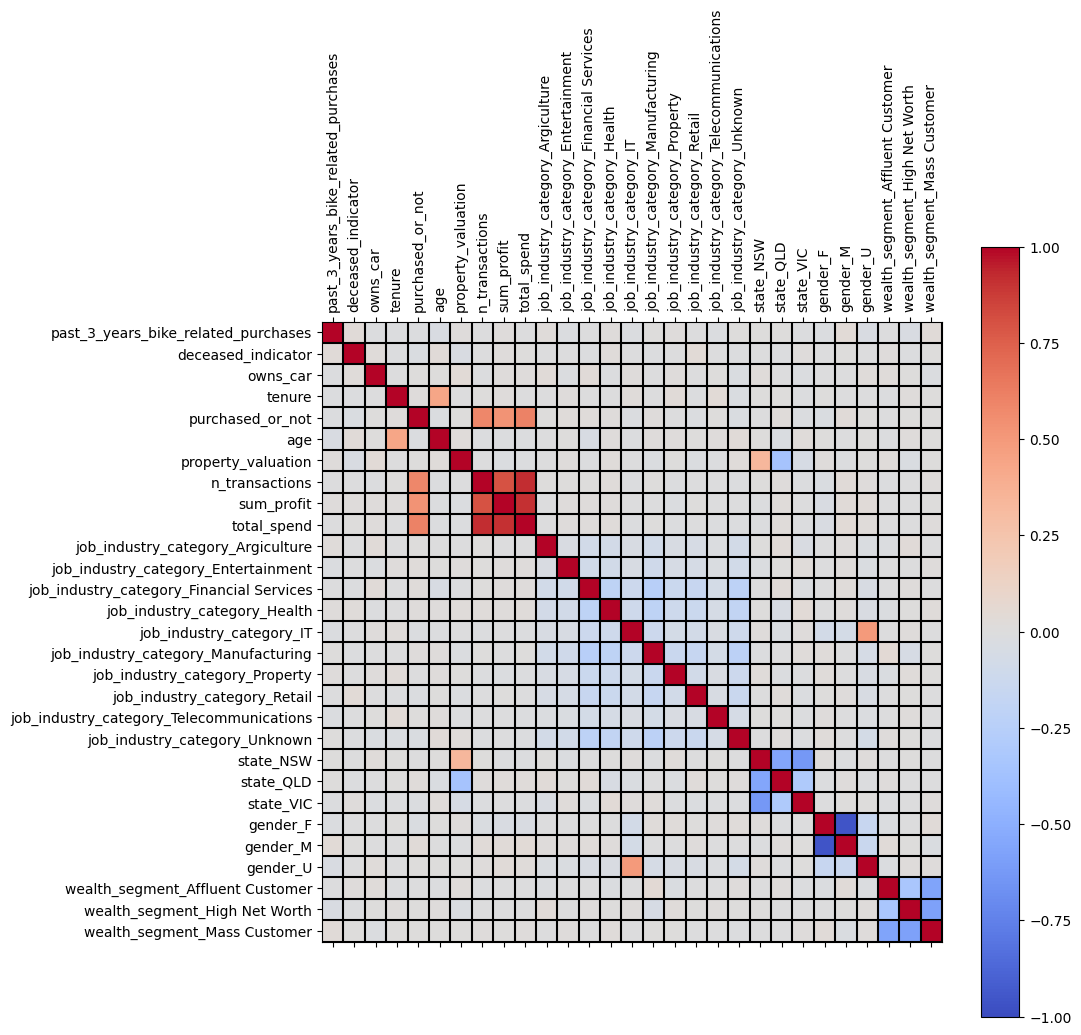

In [33]:
clustering_data = all_data_clean2.copy()
clustering_data.drop(columns=['profit','list_price'], inplace=True)
clustering_data.drop_duplicates(inplace=True)

# check correlation and display outcomes that has high correlation value (0.8)
## get the features which have high correlation
corr_matrix = clustering_data.corr()
pos_threshold = 0.8
neg_threshold = -0.8
combinations = set()

for i, row in corr_matrix.iterrows():
  for column, value in row.items():
    value = row[column]
    if value >= pos_threshold or value <= neg_threshold:
      combination = (i, column)
      combinations.add(combination)

unique_combinations = set()
for combination in combinations:
  if len(combination)> 1 and len(set(combination))==2:
    sorted_combination = tuple(sorted(combination))
    reversed_combination = tuple(reversed(sorted_combination))
    if sorted_combination not in unique_combinations and \
    reversed_combination not in unique_combinations:
      unique_combinations.add(sorted_combination)

if len(unique_combinations) != 0:
  for combination in unique_combinations:
    print('**********The highly correlated combinations**********')
    print(combination, 'correlation value is: ', corr_matrix.loc[combination[0], combination[1]])
else:
  print('**********No highly correlated feature**********')


## correlation plot
corr = clustering_data.corr()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(clustering_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(clustering_data.columns)
ax.set_yticklabels(clustering_data.columns)
n_col = len(clustering_data.columns)
plt.hlines(y=np.arange(0, n_col)+0.5, xmin=np.full(n_col, 0)-0.5,\
           xmax=np.full(n_col, n_col)-0.5, color="black")
plt.vlines(x=np.arange(0, n_col)+0.5, ymin=np.full(n_col, 0)-0.5,\
           ymax=np.full(n_col, n_col)-0.5, color="black")
plt.show()

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# reduce the dimensions using PCA
## standarized data
columns_to_standarized = ['age', 'sum_profit', 'n_transactions',\
                          'tenure', 'property_valuation',\
                          'past_3_years_bike_related_purchases']
scaler = StandardScaler()
clustering_scaled_data = clustering_data.copy()
clustering_scaled_data.drop(columns=['purchased_or_not'], inplace=True)
clustering_scaled_data[columns_to_standarized] = scaler.fit_transform(clustering_scaled_data[columns_to_standarized])

## selecting features for PCA
clustering_scaled_data.drop(columns=['n_transactions', 'sum_profit', 'total_spend'], inplace=True)

## two dimensions
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(clustering_scaled_data)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
## >> Explained variation per principal component: [0.21258501 0.14567066]

print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))
## >> Cumulative variance explained by 2 principal components: 35.83%

# finding important features with the help of PCA
dataset_pca = pd.DataFrame(abs(pca_2.components_), columns= clustering_scaled_data.columns, index = ['PC_1', 'PC_2'])
print(dataset_pca)

Explained variation per principal component: [0.20918912 0.15604293]
Cumulative variance explained by 2 principal components: 36.52%
      past_3_years_bike_related_purchases  deceased_indicator  owns_car  \
PC_1                             0.066536            0.000078  0.001786   
PC_2                             0.125760            0.000604  0.021721   

        tenure       age  property_valuation  \
PC_1  0.703858  0.706481            0.025169   
PC_2  0.032395  0.005636            0.947819   

      job_industry_category_Argiculture  job_industry_category_Entertainment  \
PC_1                           0.000829                             0.001953   
PC_2                           0.000210                             0.000997   

      job_industry_category_Financial Services  job_industry_category_Health  \
PC_1                                  0.010490                      0.001434   
PC_2                                  0.004805                      0.009017   

      ...  job

In [35]:
dataset_pca.head()

,past_3_years_bike_related_purchases,deceased_indicator,owns_car,tenure,age,property_valuation,job_industry_category_Argiculture,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,...,job_industry_category_Unknown,state_NSW,state_QLD,state_VIC,gender_F,gender_M,gender_U,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer
PC_1,0.066536,0.000078,0.001786,0.703858,0.706481,0.025169,0.000829,0.001953,0.010490,0.001434,...,0.000169,0.007572,0.009595,0.002023,0.003657,0.003949,0.000293,0.006392,0.005041,0.001350
PC_2,0.125760,0.000604,0.021721,0.032395,0.005636,0.947819,0.000210,0.000997,0.004805,0.009017,...,0.008959,0.223970,0.176190,0.047780,0.008012,0.008067,0.000055,0.010610,0.014672,0.004062


In [36]:
clustering_scaled_data.columns

Index(['past_3_years_bike_related_purchases', 'deceased_indicator', 'owns_car',
       'tenure', 'age', 'property_valuation',
       'job_industry_category_Argiculture',
       'job_industry_category_Entertainment',
       'job_industry_category_Financial Services',
       'job_industry_category_Health', 'job_industry_category_IT',
       'job_industry_category_Manufacturing', 'job_industry_category_Property',
       'job_industry_category_Retail',
       'job_industry_category_Telecommunications',
       'job_industry_category_Unknown', 'state_NSW', 'state_QLD', 'state_VIC',
       'gender_F', 'gender_M', 'gender_U', 'wealth_segment_Affluent Customer',
       'wealth_segment_High Net Worth', 'wealth_segment_Mass Customer'],
      dtype='object')

In [37]:
# select important feature for further processing for Kmeans clustering
clustering_data_after_pca = clustering_scaled_data[[
    'tenure','age', 'property_valuation']]

In [38]:
# before clustering, conduct VIF to avoid multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

clustering_scaled_data_vif = clustering_scaled_data.copy()
clustering_scaled_data_vif.drop(columns=['gender_F'], inplace=True)
## remove one variable in each set of dummy variable and target variable: 
## wealth_segment_Mass Customer; state_NSW; job_industry_category_Unknown
clustering_scaled_data_vif.drop(columns=['wealth_segment_Mass Customer', 'state_NSW', \
                              'job_industry_category_Unknown'], inplace=True)



## convert bool type to int to apply vif
for i in clustering_scaled_data_vif.columns:
  if clustering_scaled_data_vif[i].dtype == bool:
    clustering_scaled_data_vif[i] = clustering_scaled_data_vif[i].astype(int)

## get vif
vif = pd.DataFrame()
vif['Features'] = clustering_scaled_data_vif.columns
vif["VIF"] = [variance_inflation_factor(clustering_scaled_data_vif.values, i)
                          for i in range(len(clustering_scaled_data_vif.columns))]
print(vif)

## >> no multicollinearity

                                    Features       VIF
0        past_3_years_bike_related_purchases  1.007054
1                         deceased_indicator  1.007189
2                                   owns_car  1.855659
3                                     tenure  1.235838
4                                        age  1.237805
5                         property_valuation  1.171859
6          job_industry_category_Argiculture  1.077349
7        job_industry_category_Entertainment  1.083618
8   job_industry_category_Financial Services  1.490730
9               job_industry_category_Health  1.354104
10                  job_industry_category_IT  1.491423
11       job_industry_category_Manufacturing  1.468308
12            job_industry_category_Property  1.154499
13              job_industry_category_Retail  1.214480
14  job_industry_category_Telecommunications  1.044340
15                                 state_QLD  1.531201
16                                 state_VIC  1.421973
17        

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

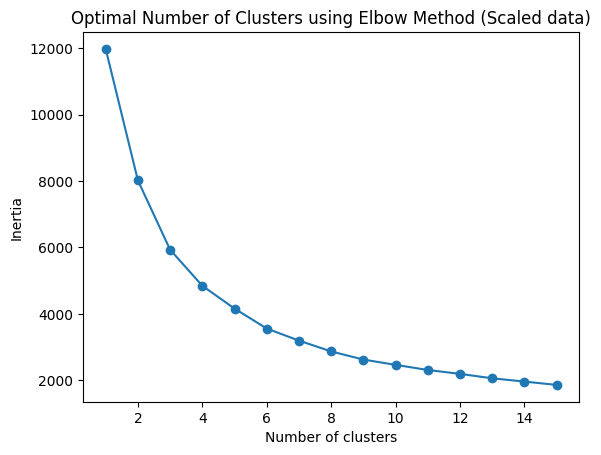

In [39]:
# k means clustering: find the optimal number of clustering first
from sklearn.cluster import KMeans

sse=[]
k_list = range(1,16)

for k in k_list:
  km = KMeans(n_clusters=k)
  km.fit(clustering_data_after_pca)
  sse.append([k, km.inertia_])

oca_results_scale = pd.DataFrame({'Cluster': range(1, 16), 'SSE': sse})
# plt.figure(figsize=(10,10))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker = 'o')
plt.title('Optimal Number of Clusters using Elbow Method (Scaled data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [40]:
from sklearn.metrics import silhouette_samples, silhouette_score
scaled_data1 = clustering_data_after_pca.copy()

kmeans_scale_2 = KMeans(n_clusters = 2, n_init=100, max_iter=400, init='k-means++',\
                      random_state=42).fit(scaled_data1)
kmeans_scale_3 = KMeans(n_clusters = 3, n_init=100, max_iter=400, init='k-means++',\
                      random_state=42).fit(scaled_data1)
kmeans_scale_4 = KMeans(n_clusters = 4, n_init=100, max_iter=400, init='k-means++',\
                      random_state=42).fit(scaled_data1)
kmeans_scale_5 = KMeans(n_clusters = 5, n_init=100, max_iter=400, init='k-means++',\
                      random_state=42).fit(scaled_data1)
kmeans_scale_6 = KMeans(n_clusters = 6, n_init=100, max_iter=400, init='k-means++',\
                      random_state=42).fit(scaled_data1)
kmeans_scale_7 = KMeans(n_clusters = 7, n_init=100, max_iter=400, init='k-means++',\
                      random_state=42).fit(scaled_data1)
kmeans_scale_8 = KMeans(n_clusters = 8, n_init=100, max_iter=400, init='k-means++',\
                      random_state=42).fit(scaled_data1)
kmeans_scale_9 = KMeans(n_clusters = 9, n_init=100, max_iter=400, init='k-means++',\
                      random_state=42).fit(scaled_data1)
kmeans_scale_10 = KMeans(n_clusters = 10, n_init=100, max_iter=400, init='k-means++',\
                      random_state=42).fit(scaled_data1)
kmeans_scale_11 = KMeans(n_clusters = 11, n_init=100, max_iter=400, init='k-means++',\
                      random_state=42).fit(scaled_data1)
kmeans_scale_12 = KMeans(n_clusters = 12, n_init=100, max_iter=400, init='k-means++',\
                      random_state=42).fit(scaled_data1)
kmeans_scale_13 = KMeans(n_clusters = 13, n_init=100, max_iter=400, init='k-means++',\
                      random_state=42).fit(scaled_data1)
kmeans_scale_14 = KMeans(n_clusters = 14, n_init=100, max_iter=400, init='k-means++',\
                      random_state=42).fit(scaled_data1)
kmeans_scale_15 = KMeans(n_clusters = 15, n_init=100, max_iter=400, init='k-means++',\
                      random_state=42).fit(scaled_data1)                                                                                                               
print('KMeans Scaled Silhouette Score (cluster 2): {}'.format(silhouette_score(scaled_data1, kmeans_scale_2.labels_, metric='euclidean')))
print('KMeans Scaled Silhouette Score (cluster 3): {}'.format(silhouette_score(scaled_data1, kmeans_scale_3.labels_, metric='euclidean')))
print('KMeans Scaled Silhouette Score (cluster 4): {}'.format(silhouette_score(scaled_data1, kmeans_scale_4.labels_, metric='euclidean')))
print('KMeans Scaled Silhouette Score (cluster 5): {}'.format(silhouette_score(scaled_data1, kmeans_scale_5.labels_, metric='euclidean')))
print('KMeans Scaled Silhouette Score (cluster 6): {}'.format(silhouette_score(scaled_data1, kmeans_scale_6.labels_, metric='euclidean')))
print('KMeans Scaled Silhouette Score (cluster 7): {}'.format(silhouette_score(scaled_data1, kmeans_scale_7.labels_, metric='euclidean')))
print('KMeans Scaled Silhouette Score (cluster 8): {}'.format(silhouette_score(scaled_data1, kmeans_scale_8.labels_, metric='euclidean')))
print('KMeans Scaled Silhouette Score (cluster 9): {}'.format(silhouette_score(scaled_data1, kmeans_scale_9.labels_, metric='euclidean')))
print('KMeans Scaled Silhouette Score (cluster 10): {}'.format(silhouette_score(scaled_data1, kmeans_scale_10.labels_, metric='euclidean')))
print('KMeans Scaled Silhouette Score (cluster 11): {}'.format(silhouette_score(scaled_data1, kmeans_scale_11.labels_, metric='euclidean')))
print('KMeans Scaled Silhouette Score (cluster 12): {}'.format(silhouette_score(scaled_data1, kmeans_scale_12.labels_, metric='euclidean')))
print('KMeans Scaled Silhouette Score (cluster 12): {}'.format(silhouette_score(scaled_data1, kmeans_scale_13.labels_, metric='euclidean')))
print('KMeans Scaled Silhouette Score (cluster 14): {}'.format(silhouette_score(scaled_data1, kmeans_scale_14.labels_, metric='euclidean')))
print('KMeans Scaled Silhouette Score (cluster 15): {}'.format(silhouette_score(scaled_data1, kmeans_scale_15.labels_, metric='euclidean')))

KMeans Scaled Silhouette Score (cluster 2): 0.31384948213728703
KMeans Scaled Silhouette Score (cluster 3): 0.31896046971169484
KMeans Scaled Silhouette Score (cluster 4): 0.2937745414230033
KMeans Scaled Silhouette Score (cluster 5): 0.2893755216568663
KMeans Scaled Silhouette Score (cluster 6): 0.29555064679378446
KMeans Scaled Silhouette Score (cluster 7): 0.2868512380011802
KMeans Scaled Silhouette Score (cluster 8): 0.28644026826941654
KMeans Scaled Silhouette Score (cluster 9): 0.2916686024373754
KMeans Scaled Silhouette Score (cluster 10): 0.2922224940806844
KMeans Scaled Silhouette Score (cluster 11): 0.28918483732420025
KMeans Scaled Silhouette Score (cluster 12): 0.269900320399656
KMeans Scaled Silhouette Score (cluster 12): 0.2779164431291196
KMeans Scaled Silhouette Score (cluster 14): 0.2728283369098203
KMeans Scaled Silhouette Score (cluster 15): 0.270239975222169


Both elbow method and silhouette score show that the number of clusters should be 3.

In [41]:
# Apply K means clustering
optimum_num_cluster = 3
kmeans = KMeans(n_clusters = optimum_num_cluster, random_state=42)
kmeans.fit(clustering_data_after_pca)
cluster_labels = kmeans.labels_

# create a dataframe copy 
modelling_data = clustering_data.copy()
# assign the cluster labels back to the dataframe with other features
modelling_data['Cluster'] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [42]:
modelling_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3992 entries, 0 to 20450
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   past_3_years_bike_related_purchases       3992 non-null   int64  
 1   deceased_indicator                        3992 non-null   bool   
 2   owns_car                                  3992 non-null   bool   
 3   tenure                                    3992 non-null   float64
 4   purchased_or_not                          3992 non-null   bool   
 5   age                                       3992 non-null   float64
 6   property_valuation                        3992 non-null   int64  
 7   n_transactions                            3992 non-null   int64  
 8   sum_profit                                3992 non-null   float64
 9   total_spend                               3992 non-null   float64
 10  job_industry_category_Argiculture  

# Data Modelling Linear Regression (all data)

In [43]:
# remove one dummy variable for each set to avoid multicollinearity
modelling_data1 = modelling_data.copy()
modelling_data1.drop(columns=['wealth_segment_Mass Customer', 'state_NSW', \
                              'job_industry_category_Unknown', 'gender_F', \
                             'total_spend', 'n_transactions', 'sum_profit'],\
                     inplace=True)


<ipython-input-86-9eaa9fb0aec6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster0_data.drop(columns=['Cluster'], inplace=True)
<ipython-input-86-9eaa9fb0aec6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster1_data.drop(columns=['Cluster'], inplace=True)
<ipython-input-86-9eaa9fb0aec6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster2_data.drop(columns=['Cluster'], inplace=True)


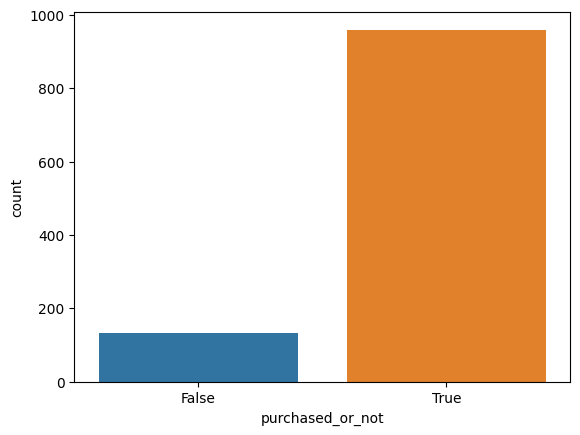

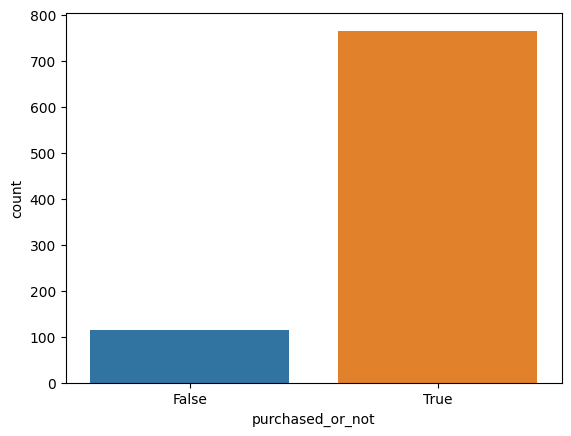

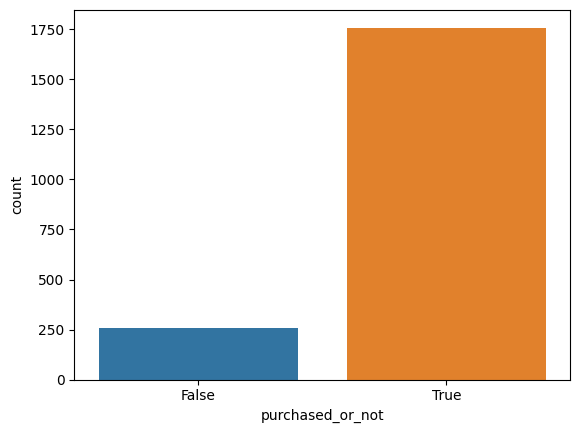

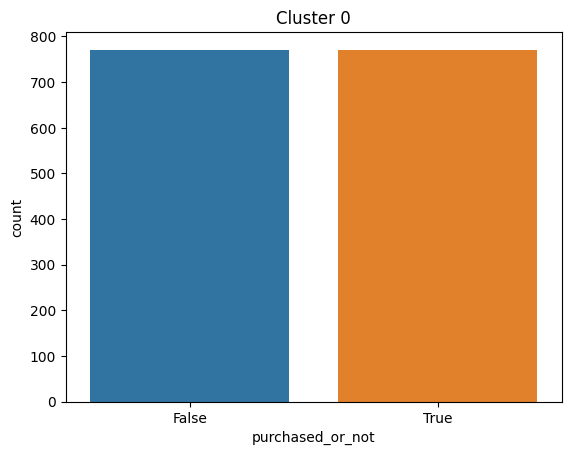

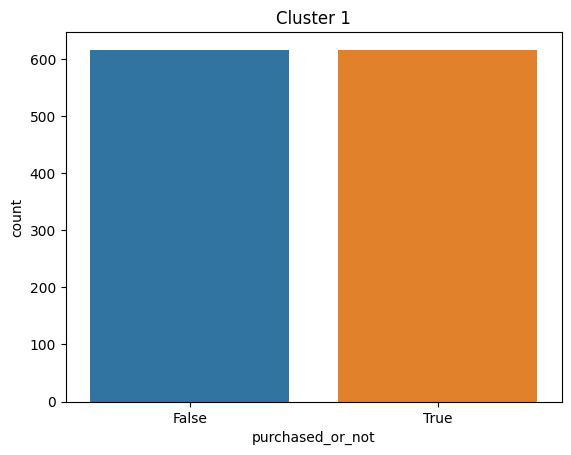

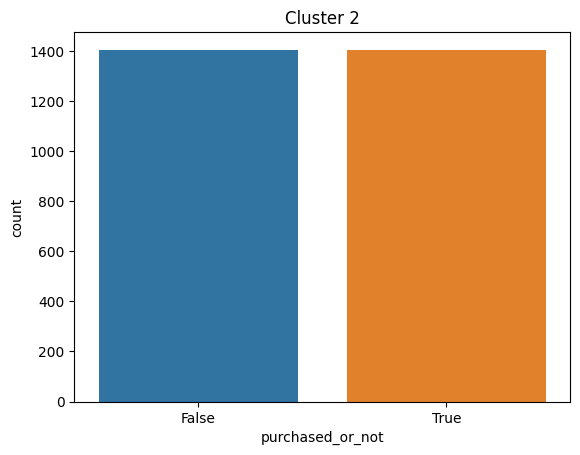

In [86]:
# over sampling
## divide data to three cluster sets
cluster0_data = modelling_data1.loc[modelling_data['Cluster'] == 0]
cluster1_data = modelling_data1.loc[modelling_data['Cluster'] == 1]
cluster2_data = modelling_data1.loc[modelling_data['Cluster'] == 2]

## remove cluster feature
cluster0_data.drop(columns=['Cluster'], inplace=True)
cluster1_data.drop(columns=['Cluster'], inplace=True)
cluster2_data.drop(columns=['Cluster'], inplace=True)

## view the overall target varaible - purchased_or_not
sns.countplot(x='purchased_or_not', data=cluster0_data)
plt.show()

sns.countplot(x='purchased_or_not', data=cluster1_data)
plt.show()

sns.countplot(x='purchased_or_not', data=cluster2_data)
plt.show()

## get the train and test datasets
##(cluster 0)
X0 = cluster0_data.loc[:, cluster0_data.columns != 'purchased_or_not']
y0 = cluster0_data.loc[:, cluster0_data.columns == 'purchased_or_not']
X1 = cluster1_data.loc[:, cluster1_data.columns != 'purchased_or_not']
y1 = cluster1_data.loc[:, cluster1_data.columns == 'purchased_or_not']
X2 = cluster2_data.loc[:, cluster2_data.columns != 'purchased_or_not']
y2 = cluster2_data.loc[:, cluster2_data.columns == 'purchased_or_not']
os = SMOTE(random_state=0)
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.2, random_state=0)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

columns = X0_train.columns

os_data_X0,os_data_y0 =os.fit_resample(X0_train, y0_train)
os_data_X0 = pd.DataFrame(data=os_data_X0,columns=columns )
os_data_y0= pd.DataFrame(data=os_data_y0,columns=['purchased_or_not'])

os_data_X1,os_data_y1 =os.fit_resample(X1_train, y1_train)
os_data_X1 = pd.DataFrame(data=os_data_X1,columns=columns )
os_data_y1= pd.DataFrame(data=os_data_y1,columns=['purchased_or_not'])

os_data_X2,os_data_y2 =os.fit_resample(X2_train, y2_train)
os_data_X2 = pd.DataFrame(data=os_data_X2,columns=columns )
os_data_y2 = pd.DataFrame(data=os_data_y2,columns=['purchased_or_not'])

# check whether the data is balanced after oversampling
sns.countplot(x='purchased_or_not', data=os_data_y0)
plt.title('Cluster 0')
plt.show()

sns.countplot(x='purchased_or_not', data=os_data_y1)
plt.title('Cluster 1')
plt.show()

sns.countplot(x='purchased_or_not', data=os_data_y2)
plt.title('Cluster 2')
plt.show()
# build a Logistic Regression model
# first time try
# logit_model=sm.Logit(os_data_y,sm.add_constant(os_data_X))
# result=logit_model.fit()
# print(result.summary())
# second time try
# model = LogisticRegression()
# model.fit(os_data_X, os_data_y)
# os_data_X = sm.add_constant(os_data_X)
# logit_model = sm.Logit(os_data_y, os_data_X)
# result = logit_model.fit()
# p_values = result.pvalues

# Logistic Regression

In [87]:
# build model
print('*****model relevant value*****')
model_lr_c0 = LogisticRegression(solver='liblinear', random_state=0).fit(os_data_X0, os_data_y0)

intercept = model_lr_c0.intercept_
coefficients = model_lr_c0.coef_
print('\nClustering 0 intercept: ',intercept)
print('\nClustering 0 coefficients: ', coefficients)

model_lr_c1 = LogisticRegression(solver='liblinear', random_state=0).fit(os_data_X1, os_data_y1)

intercept = model_lr_c1.intercept_
coefficients = model_lr_c1.coef_
print('\nClustering 1 intercept: ',intercept)
print('\nClustering 1 coefficients: ',coefficients)

model_lr_c2 = LogisticRegression(solver='liblinear', random_state=0).fit(os_data_X2, os_data_y2)

intercept = model_lr_c2.intercept_
coefficients = model_lr_c2.coef_
print('\nClustering 2 intercept', intercept)
print('\nClustering 2 coefficients: ', coefficients)
# # cross validation:
# logreg = LogisticRegression()
# scores = cross_val_score(logreg, os_data_X, os_data_y, cv=5)
# print('cross-validation scores: ', scores)
# print('mean accuracy: ', scores.mean())
# print('standard deviation: ', scores.std())

# get the accuracy of the model
## (cluster 0)
accuracy_train_c0 = model_lr_c0.score(os_data_X0,os_data_y0)
accuracy_test_c0 = model_lr_c0.score(X0_test,y0_test)
y0_pred_lr = model_lr_c0.predict(X0_test)
y0_scores_lr = model_lr_c0.predict_proba(X0_test)[:, 1]
report_c0 = classification_report(y0_test, y0_pred_lr)

print('\n*****cluster 0 metrics*****')
print(accuracy_train_c0, accuracy_test_c0)
print(report_c0)

## (cluster 1)
accuracy_train_c1 = model_lr_c1.score(os_data_X1,os_data_y1)
accuracy_test_c1 = model_lr_c1.score(X1_test,y1_test)
y1_pred_lr = model_lr_c1.predict(X1_test)
y1_scores_lr = model_lr_c1.predict_proba(X1_test)[:, 1]
report_c1 = classification_report(y1_test, y1_pred_lr)

print('\n*****cluster 1 metrics*****')
print(accuracy_train_c1, accuracy_test_c1)
print(report_c1)

## (cluster 2)
accuracy_train_c2 = model_lr_c2.score(os_data_X2,os_data_y2)
accuracy_test_c2 = model_lr_c2.score(X2_test,y2_test)
y2_pred_lr = model_lr_c2.predict(X2_test)
y2_scores = model_lr_c2.predict_proba(X2_test)[:, 1]
report_c2 = classification_report(y2_test, y2_pred_lr)

print('\n*****cluster 2 metrics*****')
print(accuracy_train_c2, accuracy_test_c2)
print(report_c2)

*****model relevant value*****

Clustering 0 intercept:  [-3.25654612]

Clustering 0 coefficients:  [[-1.33118274e-03  0.00000000e+00 -4.59007982e-01 -3.06026927e-02
   1.77614268e-02  1.11716636e-01  2.39993976e+00  2.34020558e+00
   2.39842287e+00  1.92065437e+00  1.99281166e+00  2.19833034e+00
   2.47557984e+00  2.48000826e+00  1.77559363e+00  1.61454815e+00
   1.00796775e+00  1.32743248e+00  0.00000000e+00  9.73864911e-01
   1.04972632e+00]]

Clustering 1 intercept:  [-1.08477874]

Clustering 1 coefficients:  [[-7.63797922e-04 -7.61502355e-01 -1.09236633e+00  4.65609765e-02
  -2.53854189e-02  6.25350879e-02  2.07779754e+00  1.30239722e+00
   2.21905974e+00  1.60860241e+00  2.28160937e+00  2.06905104e+00
   2.94008051e+00  1.59293615e+00  1.83090344e+00  1.63194366e+00
   8.04137301e-01  1.07365251e+00  9.65455840e-01  7.86767700e-01
   8.41612904e-01]]

Clustering 2 intercept [-2.66872387]

Clustering 2 coefficients:  [[-1.07909497e-03  0.00000000e+00 -7.28043452e-01 -1.11033823e-0

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# SVM

In [88]:
# try svm
from sklearn import svm
from sklearn.metrics import accuracy_score
model_svm_c0 = svm.SVC(kernel='rbf', probability=True, random_state=0)
model_svm_c0.fit(os_data_X0, os_data_y0)
y0_pred_svm_test = model_svm_c0.predict(X0_test)
y0_pred__svm_train = model_svm_c0.predict(os_data_X0)

accuracy_test_svm_c0 = accuracy_score(y0_test, y0_pred_svm_test)
accuracy_train_svm_c0 = accuracy_score(os_data_y0, y0_pred__svm_train)
print('\n*****cluster 0 accuracy comparison*****')
print(accuracy_train_svm_c0, accuracy_test_svm_c0)

model_svm_c1 = svm.SVC(kernel='rbf', probability=True, random_state=0)
model_svm_c1.fit(os_data_X1, os_data_y1)
y1_pred_svm_test = model_svm_c1.predict(X1_test)
y1_pred_svm_train = model_svm_c1.predict(os_data_X1)

accuracy_test_svm_c1 = accuracy_score(y1_test, y1_pred_svm_test)
accuracy_train_svm_c1 = accuracy_score(os_data_y1, y1_pred_svm_train)
print('\n*****cluster 1 accuracy comparison*****')
print(accuracy_train_svm_c1, accuracy_test_svm_c1)

model_svm_c2 = svm.SVC(kernel='rbf', probability=True, random_state=0)
model_svm_c2.fit(os_data_X2, os_data_y2)
y2_pred_svm_test = model_svm_c2.predict(X2_test)
y2_pred_svm_train = model_svm_c2.predict(os_data_X2)

accuracy_test_svm_c2 = accuracy_score(y2_test, y2_pred_svm_test)
accuracy_train_svm_c2 = accuracy_score(os_data_y2, y2_pred_svm_train)
print('\n*****cluster 2 accuracy comparison*****')
print(accuracy_train_svm_c2, accuracy_test_svm_c2, '\n')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



*****cluster 0 accuracy comparison*****
0.5616083009079118 0.4063926940639269


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



*****cluster 1 accuracy comparison*****
0.6282467532467533 0.4971751412429379


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



*****cluster 2 accuracy comparison*****
0.5583629893238434 0.6287128712871287 



# Decision Trees

In [90]:
# try decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import mutual_info_classif

model_dt_c0 = DecisionTreeClassifier(random_state=0)
model_dt_c0.fit(os_data_X0, os_data_y0)
y0_pred_dt_test = model_dt_c0.predict(X0_test)
y0_pred_dt_train = model_dt_c0.predict(os_data_X0)

accuracy_test_dt_c0 = accuracy_score(y0_test, y0_pred_dt_test)
accuracy_train_dt_c0 = accuracy_score(os_data_y0, y0_pred_dt_train)

print('\nThe accuracy rate in training dataset and testing dataset (cluster 0)',\
      accuracy_train_dt_c0, accuracy_test_dt_c0)

model_dt_c1 = DecisionTreeClassifier(random_state=0)
model_dt_c1.fit(os_data_X1, os_data_y1)
y1_pred_dt_test = model_dt_c1.predict(X1_test)
y1_pred_dt_train = model_dt_c1.predict(os_data_X1)

accuracy_test_dt_c1 = accuracy_score(y1_test, y1_pred_dt_test)
accuracy_train_dt_c1 = accuracy_score(os_data_y1, y1_pred_dt_train)

print('\nThe accuracy rate in training dataset and testing dataset (cluster 1)',\
      accuracy_train_dt_c1, accuracy_test_dt_c1)

model_dt_c2 = DecisionTreeClassifier(random_state=0)
model_dt_c2.fit(os_data_X2, os_data_y2)
y2_pred_dt_test = model_dt_c2.predict(X2_test)
y2_pred_dt_train = model_dt_c2.predict(os_data_X2)

accuracy_test_dt_c2 = accuracy_score(y2_test, y2_pred_dt_test)
accuracy_train_dt_c2 = accuracy_score(os_data_y2, y2_pred_dt_train)

print('\nThe accuracy rate in training dataset and testing dataset (cluster 2)',\
      accuracy_train_dt_c2, accuracy_test_dt_c2)
# # information gain for each feature
# importances = model.feature_importances_
# feature_importance_df = pd.DataFrame({'Feature': os_data_X.columns, \
#                                       'Importance':importances})
# feature_importance_df = feature_importance_df.sort_values(by='Importance',\
#                                                           ascending=False)
# print(feature_importance_df)


# info_gain = mutual_info_classif(os_data_X, os_data_y)
# for i, feature in enumerate(os_data_X.columns):
#   print(f'Feature: {feature}, Information Gain:{info_gain[i]}')


The accuracy rate in training dataset and testing dataset (cluster 0) 1.0 0.7168949771689498

The accuracy rate in training dataset and testing dataset (cluster 1) 1.0 0.7175141242937854

The accuracy rate in training dataset and testing dataset (cluster 2) 1.0 0.7103960396039604


# ROC chart (cluster 0)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


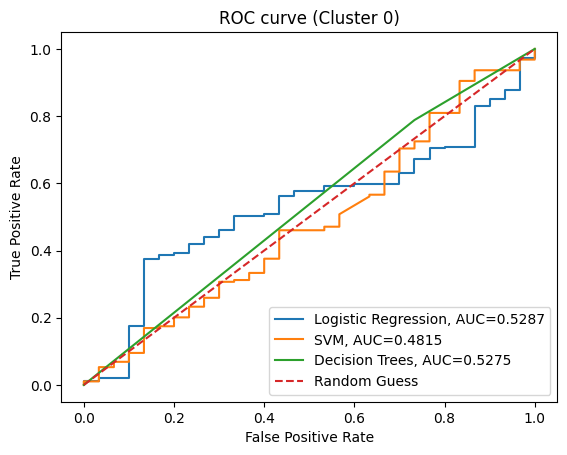

In [91]:
from sklearn import metrics
#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
model_lr_c0 = LogisticRegression(solver='liblinear', \
                                 random_state=0).fit(os_data_X0, os_data_y0)
y_pred_lr_c0 = model_lr_c0.predict_proba(X0_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y0_test, y_pred_lr_c0)
auc = round(metrics.roc_auc_score(y0_test, y_pred_lr_c0), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit SVM model and plot ROC curve
y_pred_svm_c0 = model_svm_c0.predict_proba(X0_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y0_test, y_pred_svm_c0)
auc = round(metrics.roc_auc_score(y0_test, y_pred_svm_c0), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))

#fit decision trees model and plot ROC curve
y_pred_dt_c0 = model_dt_c0.predict_proba(X0_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y0_test, y_pred_dt_c0)
auc = round(metrics.roc_auc_score(y0_test, y_pred_dt_c0), 4)
plt.plot(fpr,tpr,label="Decision Trees, AUC="+str(auc))

# baseline
plt.plot([0,1], [0,1], linestyle='--', label='Random Guess')

#add other plot features
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve (Cluster 0)')
plt.legend(loc='lower right')

# ROC chart (cluster 1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


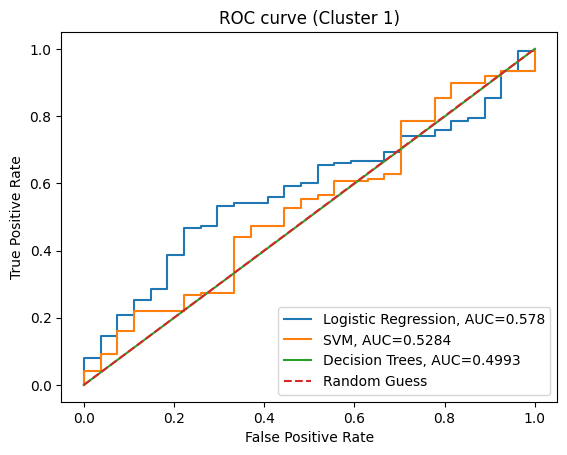

In [92]:
#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
model_lr_c1 = LogisticRegression(solver='liblinear', \
                                 random_state=0).fit(os_data_X1, os_data_y1)
y_pred_lr_c1 = model_lr_c1.predict_proba(X1_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y1_test, y_pred_lr_c1)
auc = round(metrics.roc_auc_score(y1_test, y_pred_lr_c1), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit SVM model and plot ROC curve
y_pred_svm_c1 = model_svm_c1.predict_proba(X1_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y1_test, y_pred_svm_c1)
auc = round(metrics.roc_auc_score(y1_test, y_pred_svm_c1), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))

#fit decision trees model and plot ROC curve
y_pred_dt_c1 = model_dt_c1.predict_proba(X1_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y1_test, y_pred_dt_c1)
auc = round(metrics.roc_auc_score(y1_test, y_pred_dt_c1), 4)
plt.plot(fpr,tpr,label="Decision Trees, AUC="+str(auc))

# baseline
plt.plot([0,1], [0,1], linestyle='--', label='Random Guess')

#add other plot features
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve (Cluster 1)')
plt.legend(loc='lower right')

# ROC chart (cluster 2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


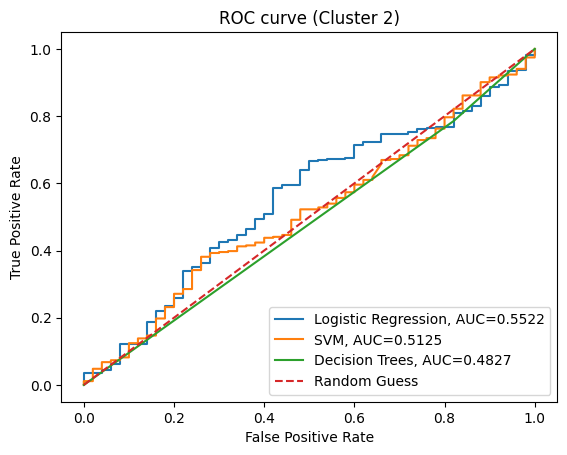

In [93]:
#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
model_lr_c2 = LogisticRegression(solver='liblinear', \
                                 random_state=0).fit(os_data_X2, os_data_y2)
y_pred_lr_c2 = model_lr_c2.predict_proba(X2_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y2_test, y_pred_lr_c2)
auc = round(metrics.roc_auc_score(y2_test, y_pred_lr_c2), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit SVM model and plot ROC curve
y_pred_svm_c2 = model_svm_c2.predict_proba(X2_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y2_test, y_pred_svm_c2)
auc = round(metrics.roc_auc_score(y2_test, y_pred_svm_c2), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc))

#fit decision trees model and plot ROC curve
y_pred_dt_c2 = model_dt_c2.predict_proba(X2_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y2_test, y_pred_dt_c2)
auc = round(metrics.roc_auc_score(y2_test, y_pred_dt_c2), 4)
plt.plot(fpr,tpr,label="Decision Trees, AUC="+str(auc))

# baseline
plt.plot([0,1], [0,1], linestyle='--', label='Random Guess')

#add other plot features
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve (Cluster 2)')
plt.legend(loc='lower right')

After comparing three models in each cluster, Logistic Regression has slightly higher accuracy and AUC. Also, the accuracy rates between training data and testing data don't have much difference in the Logistic Regression model, meaning the models don't have overfit problem. I decide to use logistic regression for NewCustomerList analysis.

# Preprocess the NewCustomerList dataset 

In [94]:
print(modelling_data1.info())
print(NewCustomerList.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3992 entries, 0 to 20450
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   past_3_years_bike_related_purchases       3992 non-null   int64  
 1   deceased_indicator                        3992 non-null   bool   
 2   owns_car                                  3992 non-null   bool   
 3   tenure                                    3992 non-null   float64
 4   purchased_or_not                          3992 non-null   bool   
 5   age                                       3992 non-null   float64
 6   property_valuation                        3992 non-null   int64  
 7   job_industry_category_Argiculture         3992 non-null   uint8  
 8   job_industry_category_Entertainment       3992 non-null   uint8  
 9   job_industry_category_Financial Services  3992 non-null   uint8  
 10  job_industry_category_Health       

In [104]:
# remove variables
NewCustomerList1 = NewCustomerList.copy()
NewCustomerList1.drop(columns=['first_name', 'last_name', 'job_title', 'address',\
                               'postcode', 'country', 'Unnamed: 16',\
                               'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',\
                               'Unnamed: 20', 'Rank', 'Value'], inplace=True)
# calculate the age
NewCustomerList1['age'] = (now - NewCustomerList1['DOB']).astype('<m8[Y]')
# remove DOB
NewCustomerList1.drop(columns=['DOB'], inplace=True)
# deceased_indicator; owns_car; gender
NewCustomerList1['deceased_indicator'].unique()
NewCustomerList1['deceased_indicator'].replace(['N', 'Y'], [0,1], inplace=True)

NewCustomerList1['owns_car'].unique()
NewCustomerList1['owns_car'].replace(['No', 'Yes'], [0,1], inplace=True)

NewCustomerList1['gender'].unique()
NewCustomerList1['gender'].replace(['Male', 'Female'], ['M','F'], inplace=True)


# filling missing value with mean
NewCustomerList1['job_industry_category'].fillna('Unknown', inplace=True)
NewCustomerList1['age'].fillna(NewCustomerList1['age'].mean(), inplace=True)

# create dummy variables
NewCustomerList1 = pd.get_dummies(data=NewCustomerList1, columns=['gender', \
                                  'job_industry_category','wealth_segment', \
                                  'state'])
# drop variables not used in the model
NewCustomerList1.drop(columns=['job_industry_category_Unknown', 'gender_F',\
                              'wealth_segment_Mass Customer', 'state_NSW'], inplace=True)


In [105]:
# subset data to get cluster from the kmean
NewCustomerList2 = NewCustomerList1[['tenure','age', 'property_valuation']]
# Assign new data points to existing clusters
# assign the cluster labels back to the dataframe with other features
kmeans.fit(NewCustomerList2)
cluster_labels = kmeans.labels_
NewCustomerList1['Cluster'] = cluster_labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [106]:
NewCustomerList1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   past_3_years_bike_related_purchases       1000 non-null   int64  
 1   deceased_indicator                        1000 non-null   int64  
 2   owns_car                                  1000 non-null   int64  
 3   tenure                                    1000 non-null   int64  
 4   property_valuation                        1000 non-null   int64  
 5   age                                       1000 non-null   float64
 6   gender_M                                  1000 non-null   uint8  
 7   gender_U                                  1000 non-null   uint8  
 8   job_industry_category_Argiculture         1000 non-null   uint8  
 9   job_industry_category_Entertainment       1000 non-null   uint8  
 10  job_industry_category_Financial Servi

# Predict Purchase Decisions using model

In [107]:
# divide data to each cluster set
NewCustomerList1 = NewCustomerList1[['past_3_years_bike_related_purchases', \
                                     'deceased_indicator', 'owns_car',\
                                     'tenure', 'age','property_valuation', \
                                     'job_industry_category_Argiculture',\
                                     'job_industry_category_Entertainment', \
                                     'job_industry_category_Financial Services',\
                                     'job_industry_category_Health',\
                                     'job_industry_category_IT', \
                                     'job_industry_category_Manufacturing',\
                                     'job_industry_category_Property',\
                                     'job_industry_category_Retail',\
                                     'job_industry_category_Telecommunications',\
                                     'state_QLD', 'state_VIC', 'gender_M', \
                                     'gender_U', 'wealth_segment_Affluent Customer',\
                                     'wealth_segment_High Net Worth',
                                     'Cluster']]
NewCustomerList1_c0 = NewCustomerList1.loc[NewCustomerList1['Cluster'] == 0]
NewCustomerList1_c1 = NewCustomerList1.loc[NewCustomerList1['Cluster'] == 1]
NewCustomerList1_c2 = NewCustomerList1.loc[NewCustomerList1['Cluster'] == 2]

In [108]:
# delete the cluster feature in the dataset
NewCustomerList1_c0.drop(columns=['Cluster'], inplace=True)
NewCustomerList1_c1.drop(columns=['Cluster'], inplace=True)
NewCustomerList1_c2.drop(columns=['Cluster'], inplace=True)

# make prediction for each cluster data
purchase_decision_predict_c0 = model_lr_c0.predict(NewCustomerList1_c0)
purchase_decision_predict_c1 = model_lr_c0.predict(NewCustomerList1_c1)
purchase_decision_predict_c2 = model_lr_c0.predict(NewCustomerList1_c2)

<ipython-input-108-3646c5cf2052>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewCustomerList1_c0.drop(columns=['Cluster'], inplace=True)
<ipython-input-108-3646c5cf2052>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewCustomerList1_c1.drop(columns=['Cluster'], inplace=True)
<ipython-input-108-3646c5cf2052>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewCustomerList1_c2.drop(columns=['Cluster'], inplace=True)
<ipython-inpu

In [110]:
# assign predicted data back to the dataset
NewCustomerList1_c0['purchase_or_not'] = purchase_decision_predict_c0
NewCustomerList1_c1['purchase_or_not'] = purchase_decision_predict_c1
NewCustomerList1_c2['purchase_or_not'] = purchase_decision_predict_c2

predicted_new_customer_list = pd.concat([NewCustomerList1_c0, NewCustomerList1_c1, NewCustomerList1_c2])

<ipython-input-110-92a8adb7233a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewCustomerList1_c0['purchase_or_not'] = purchase_decision_predict_c0
<ipython-input-110-92a8adb7233a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewCustomerList1_c1['purchase_or_not'] = purchase_decision_predict_c1
<ipython-input-110-92a8adb7233a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [111]:
predicted_new_customer_list['purchase_or_not'].value_counts()

True     863
False    137
Name: purchase_or_not, dtype: int64